In [40]:
# Loading the math library
import math
# loading the Pandas Library
import pandas as pd
# Loading Numpy
import numpy as np
# loading matplotib
import matplotlib.pyplot as plt
# loading seaborn
import seaborn as sns
# printing the Max rows ,max columns, width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
# Importing the Evalution features in model
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,roc_curve,auc
from sklearn.metrics import accuracy_score
# Loading Scikit's Logistic Regression Library
from sklearn.linear_model import LogisticRegression
# Loading Scikit's GridsearchCv Library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# Loading Scikit's randomn forest classifier Library
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# cd"/Users/nikhilkrishnareddygujjarlamudi/Documents/Python Project  "

In [ ]:
# Creating an object called df with train.csv data
df= pd.read_csv("D:/archive_4/train.csv")
# Viewing the top 5 columns
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()
# found some outliers in Annual_premium.values in this column has dratically increased from 75% to max.

In [ ]:
df.isnull().sum() #To check sum of null values in each column

In [ ]:
# this shows the data set id highly imbalancing
df["Response"].value_counts()

In [ ]:
figs, axes = plt.subplots(figsize=(10,7)) #Configuring the plot size

plot = sns.countplot(df['Response']) #applying count plot function from seaborn library

plt.show() #Displaying the plot
# from this it is cleary shows that this data set is imbalace data set .

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(5,5)) #Preparing 8 sub plots with size 22, 20 

#Box plots for each column against target variable 'Response'
sns.boxplot(data=df, x='Response', y='Annual_Premium')





In [ ]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75]) # calculates the values at 25th and 75th quartile ranges
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [ ]:
lowerbound,upperbound = outlier_treatment(df.Annual_Premium) 
df[(df.Annual_Premium < lowerbound) | (df.Annual_Premium > upperbound)] #Displaying 
new_df = df[df['Annual_Premium'] < upperbound]
new_df.shape

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Annual_Premium'])
plt.subplot(2,2,2)
sns.boxplot(df['Annual_Premium'])
plt.subplot(2,2,3)
sns.distplot(new_df['Annual_Premium'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Annual_Premium'])
plt.show()

In [ ]:
plt.figure(figsize=(20,7.5)) #configuring plot size
p1 = sns.countplot(data=df,x='Gender',hue='Response') #Count plot from sea born
p1.set_xticklabels(p1.get_xticklabels(),rotation = 90) #Rotating x-labels by 90 degrees
p1.set_title("Gender", fontsize=20) #Setting title for the graph
plt.show() #Displaying graph

In [ ]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p2 = sns.countplot(data=df,x='Region_Code',hue='Response') #count plot using sea born module
p2.set_xticklabels(p2.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p2.set_title("Region Code", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

In [ ]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p3 = sns.countplot(data=df,x='Vehicle_Age',hue='Response') #count plot using sea born module
p3.set_xticklabels(p3.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p3.set_title("Vehicle Age", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot 1

In [ ]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p4 = sns.countplot(data=df,x='Vehicle_Damage',hue='Response') #count plot using sea born module
p4.set_xticklabels(p4.get_xticklabels(),rotation = 90) #Rotating x-lables by 90 degrees
p4.set_title("Vehicle Damage", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

In [ ]:
plt.figure(figsize=(20,7.5)) #Configuring plot size
p8 = sns.countplot(y="Policy_Sales_Channel", hue="Response", data=df, palette="Greens_d",
              order=df.Policy_Sales_Channel.value_counts().iloc[:10].index) #count plot using sea born module
p8.set_title("Policy_Sales_Channel", fontsize=20) #Setting title for the graph
plt.show() #Displaying plot

In [ ]:
#Creating bins for annual premium
df.loc[(df['Annual_Premium'] <= 24000 ), 'Annual_Premium_Bins'] = '<24k'
df.loc[(df['Annual_Premium'] > 24000 ) & (df['Annual_Premium'] <= 40000 ), 'Annual_Premium_Bins'] = '24k - 40k'
df.loc[(df['Annual_Premium'] > 40000 ), 'Annual_Premium_Bins'] = '> 40k'
df.head(100)

In [ ]:
plt.figure(figsize=(20,7.5))
p9 = sns.countplot(data=df,x='Annual_Premium_Bins',hue='Response')
p9.set_xticklabels(p9.get_xticklabels(),rotation = 90)
p9.set_title("Annual Premium", fontsize=20)
plt.show()

In [ ]:
#Gender changes from "male" and "female" to 1 and 0
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df.head()

In [ ]:
#Converting the unique values for Vehicle_Damage and Vehicle_Age to integers
df['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)
df['Vehicle_Age']=df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
df.head()

In [41]:
#Creating a dummy variable for Region 28 as our analysis shows it has a significantly different relationship to the target
df['Region_28'] = df['Region_Code'].apply(lambda x: 1 if x == 28 else 0)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Bins,Region_28,Vehicle_Age_2,Age_Cat,PSC
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1,> 40k,1,1,3.0,1.0
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0,24k - 40k,0,0,3.0,1.0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1,24k - 40k,1,1,3.0,1.0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,24k - 40k,0,0,1.0,0.0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,24k - 40k,0,0,2.0,0.0


In [42]:
#Creating a dummy variable for Vehicle_Age as our analysis shows vehcile age of 3 (> 2 years) has a significantly different relationship to the target
df['Vehicle_Age_2'] = df['Vehicle_Age'].apply(lambda x: 1 if x == 3 else 0)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Bins,Region_28,Vehicle_Age_2,Age_Cat,PSC
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1,> 40k,1,1,3.0,1.0
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0,24k - 40k,0,0,3.0,1.0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1,24k - 40k,1,1,3.0,1.0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,24k - 40k,0,0,1.0,0.0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,24k - 40k,0,0,2.0,0.0


In [43]:
#Applying bins to Age field based off of prior EDA work
df.loc[df['Age'] <= 27, 'Age_Cat'] = 1
df.loc[(df['Age'] >= 28) & (df['Age'] <= 36), 'Age_Cat'] = 2
df.loc[(df['Age'] >= 36) , 'Age_Cat'] = 3
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Bins,Region_28,Vehicle_Age_2,Age_Cat,PSC
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1,> 40k,1,1,3.0,1.0
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0,24k - 40k,0,0,3.0,1.0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1,24k - 40k,1,1,3.0,1.0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,24k - 40k,0,0,1.0,0.0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,24k - 40k,0,0,2.0,0.0


In [44]:
#Binning Policy_Sales_Channel based off of prior EDA work
df.loc[df['Policy_Sales_Channel'].isin([26.0, 124.0]), 'PSC'] = 1
#df.loc[df['Policy_Sales_Channel'].isin([152, 156]), 'PSC'] = 2
df['PSC'].fillna(value = 0, inplace = True)
df.head(100)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Bins,Region_28,Vehicle_Age_2,Age_Cat,PSC
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1,> 40k,1,1,3.0,1.0
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0,24k - 40k,0,0,3.0,1.0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1,24k - 40k,1,1,3.0,1.0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,24k - 40k,0,0,1.0,0.0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,24k - 40k,0,0,2.0,0.0
5,6,0,24,1,33.0,0,1,1,2630.0,160.0,176,0,<24k,0,0,1.0,0.0
6,7,1,23,1,11.0,0,1,1,23367.0,152.0,249,0,<24k,0,0,1.0,0.0
7,8,0,56,1,28.0,0,2,1,32031.0,26.0,72,1,24k - 40k,1,0,3.0,1.0
8,9,0,24,1,3.0,1,1,0,27619.0,152.0,28,0,24k - 40k,0,0,1.0,0.0
9,10,0,32,1,6.0,1,1,0,28771.0,152.0,80,0,24k - 40k,0,0,2.0,0.0


<AxesSubplot:>

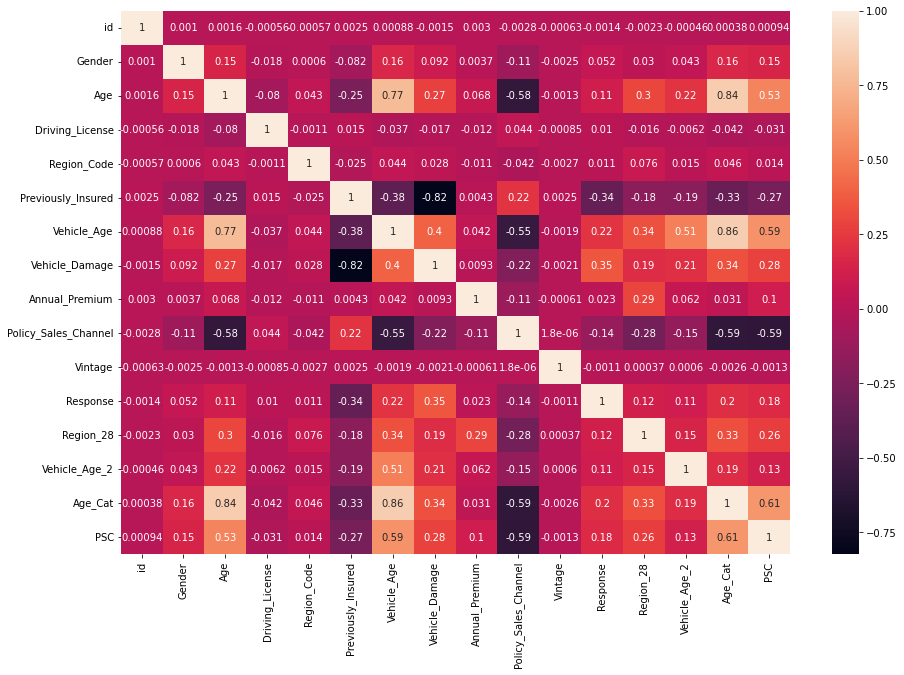

In [45]:
plt.figure(figsize=(15,10)) #Configuring plot size
sns.heatmap(df.corr(),annot=True) #Heatmap for correlation co-efficients 

In [46]:
#Cross-checking if we formed any null values in data frame
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Annual_Premium_Bins     0
Region_28               0
Vehicle_Age_2           0
Age_Cat                 0
PSC                     0
dtype: int64

In [47]:
# Creating the training data and test data 
train = pd.read_csv("D:/archive_4/train.csv")
test = pd.read_csv("D:/archive_4/test.csv")

In [48]:
# displays the shape of the training data in matrix form
train.shape

(381109, 12)

In [49]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Bins,Region_28,Vehicle_Age_2,Age_Cat,PSC
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1,> 40k,1,1,3.0,1.0
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0,24k - 40k,0,0,3.0,1.0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1,24k - 40k,1,1,3.0,1.0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,24k - 40k,0,0,1.0,0.0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,24k - 40k,0,0,2.0,0.0


In [50]:
X = df[[ 'Previously_Insured', 'Vehicle_Age_2', 'Age_Cat',
                              'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'PSC', 'Region_28']] #These are the x-features

y=df['Response'] #This is target variable
print(y.shape) #shape of y

(381109,)


In [52]:
samplers = SMOTEENN(0.62,random_state=42)
X_comb, y_comb = samplers.fit_resample(X, y) 
X_train, X_test, y_train, y_test = train_test_split(X_comb, y_comb, test_size=0.3, random_state=42)  #Data split between train and test
print(X_train.shape) #Printing shape
print(X_test.shape)

NameError: name 'SMOTEENN' is not defined

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
def pred_prob(clf, data): 
    y_pred = []
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred



In [ ]:
# Using the Random search method to determine the best parametre of the model
grid_values = {'penalty': ['l1','l2'], 'C': [0,0.1, 0.01,1]}

lr = LogisticRegression()
grid_search = GridSearchCV(lr, grid_values, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
# Printing the best estimater Among C and L1,l2

print(grid_search.best_estimator_)
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)


              
print('CF', confusion_matrix(y_test, final_predictions))

#printing the Precision , recall , F1-score
print('precision', precision_score(y_test, final_predictions))
print('recall', recall_score(y_test, final_predictions))
print('f1', f1_score(y_test, final_predictions))


In [ ]:
y_tr_predict=pred_prob( model,X_train)   
y_te_predict=pred_prob( model,X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_tr_predict)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_te_predict)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [ ]:
# Creating the data frame 
y_pred = pd.DataFrame(final_predictions)
y_pred.value_counts()

In [ ]:
# Creating the Randomn forest classifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
# Training the Classifier
CV_rfc.fit(X_train, y_train)#

In [ ]:
# Diaplaying the best Parametres
CV_rfc.best_params_

In [ ]:
# Applying the traing model to test
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
clf=rfc1.fit(X_train, y_train)
final_model = clf
final_predictions = final_model.predict(X_test)

y_pred_new = final_model.predict_proba(X_test)[:,1]

# Creating and displaying  the confusion matrix , Precesion , Recall , F1-Score , AUC score 
              
print('CF', confusion_matrix(y_test, final_predictions))
print('precision', precision_score(y_test, final_predictions))
print('recall', recall_score(y_test, final_predictions))
print('f1', f1_score(y_test, final_predictions))
print('auc-roc-score', roc_auc_score(y_test, y_pred_new))